<a href="https://colab.research.google.com/github/BetikuOluwatobi/sentiment_analysis_with_transformers/blob/main/Fine_Tune_BERT_for_Text_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [1]:
!nvidia-smi

Mon Jul 24 15:24:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install TensorFlow and TensorFlow Model Garden

In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.12.0


In [ ]:
# !pip install -q tensorflow==2.9.2

In [3]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 18.13 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: switching to '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [4]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.6/219.6 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 111.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 116.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 36.4 MB/s eta 

In [5]:
!pip install pandas==1.5.3
!pip install numpy==1.23.5
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.6 MB/s eta 0:00:00


## Restart the Runtime

**Note**
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from transformers import TFAutoModel
import sys
sys.path.append('models') # This is to enable us in importing the tensorflow model garden module
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.12.0
Eager mode:  True
Hub version:  0.14.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip",compression='zip',
                 low_memory="False")

In [4]:
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
df["question_text"][:20]

0     How did Quebec nationalists see their province...
1     Do you have an adopted dog, how would you enco...
2     Why does velocity affect time? Does velocity a...
3     How did Otto von Guericke used the Magdeburg h...
4     Can I convert montra helicon D to a mountain b...
5     Is Gaza slowly becoming Auschwitz, Dachau or T...
6     Why does Quora automatically ban conservative ...
7     Is it crazy if I wash or wipe my groceries off...
8     Is there such a thing as dressing moderately, ...
9     Is it just me or have you ever been in this ph...
10                     What can you say about feminism?
11                 How were the Calgary Flames founded?
12    What is the dumbest, yet possibly true explana...
13    Can we use our external hard disk as a OS as w...
14    I am 30, living at home and have no boyfriend....
15    What do you know about Bram Fischer and the Ri...
16    How difficult is it to find a good instructor ...
17                Have you licked the skin of a 

<Axes: ylabel='Frequency'>

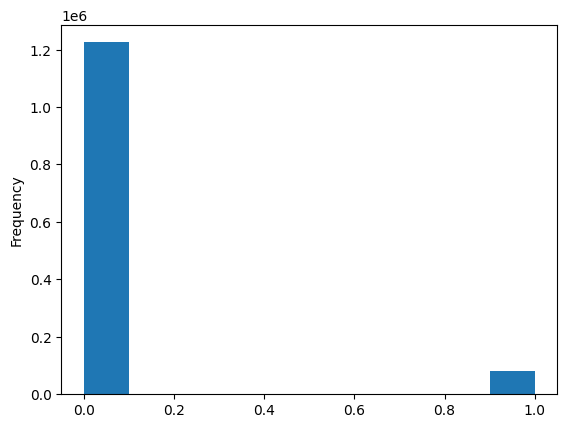

In [6]:
df['target'].plot(kind='hist')

In [7]:
df['question_text'].values

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       ..., 'Is foam insulation toxic?',
       'How can one start a research project based on biochemistry at UG level?',
       'Who wins in a battle between a Wolverine and a Puma?'],
      dtype=object)

In [8]:
train_df, remaining = train_test_split(df, train_size=0.01,
                                      stratify=df['target'].values,random_state=11)
validation_df, _ = train_test_split(remaining,train_size=0.001,stratify=remaining['target'].values,random_state=11)
train_df.shape, validation_df.shape

((13061, 3), (1293, 3))

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [9]:
with tf.device('/cpu:0'):
  train_dataset = tf.data.Dataset.from_tensor_slices((train_df['question_text'].values, train_df['target'].values))
  valid_dataset = tf.data.Dataset.from_tensor_slices((validation_df['question_text'].values, validation_df['target'].values))

  labels = {0:'Sincere',1:"Insincere"}
  for text, label in train_dataset.skip(1).take(2):
    print(text.numpy(),list(map(lambda x: labels[x], [label.numpy()])))

b'Do we need entrepreneurs or engineers?' ['Sincere']
b'Should I disclose my current CTC when asked at the time of interview?' ['Sincere']


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [10]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

labels = [0,1]# Label categories
max_len = 128 # maximum length of (token) input sequences
train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4', trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file,do_lower_case)

In [11]:
tokenizer.wordpiece_tokenizer.tokenize('Hello world, i am tweeting from lagos'.lower())

['hello', 'world', '##,', 'i', 'am', 't', '##wee', '##ting', 'from', 'lagos']

In [12]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('Hello world, i am tweeting from lagos'.lower()))

[7592, 2088, 29623, 1045, 2572, 1056, 28394, 3436, 2013, 16738]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [13]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=labels, max_seq_length=max_len, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid=None,
                                             text_a=text.numpy(),text_b=None,
                                             label=label.numpy())
  feature = classifier_data_lib.convert_single_example(0,example, label_list=label_list,max_seq_length=max_seq_length,
                                                       tokenizer=tokenizer)

  return (feature.input_ids, feature.input_mask, feature.label_id)

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [14]:
def to_feature_map(text, label):
  input_ids, input_mask, label_id = tf.py_function(to_feature,inp=[text, label],
                                                                Tout=[tf.int32, tf.int32, tf.int32])
  input_ids.set_shape([max_len])
  input_mask.set_shape([max_len])
  # segment_ids.set_shape([max_len])
  label_id.set_shape([])

  x = {
      "input_ids": input_ids,
      "attention_mask": input_mask,
  }
  return (x, label_id)

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [15]:
with tf.device('/cpu:0'):
  # train
  train_data = tf.data.Dataset.from_tensor_slices((train_df['question_text'].values, train_df['target'].values))
  train_data = train_data.map(to_feature_map,num_parallel_calls=tf.data.experimental.AUTOTUNE,
                              deterministic=False).shuffle(10000)
  train_data = train_data.batch(batch_size=train_batch_size,drop_remainder=True,
                                num_parallel_calls=tf.data.experimental.AUTOTUNE,deterministic=False)
  train_data = train_data.prefetch(tf.data.AUTOTUNE)

  # valid
  valid_data = tf.data.Dataset.from_tensor_slices((validation_df['question_text'].values, validation_df['target'].values))
  valid_data = valid_data.map(to_feature_map,num_parallel_calls=tf.data.experimental.AUTOTUNE,
                              deterministic=False)
  valid_data = valid_data.batch(batch_size=train_batch_size,drop_remainder=True,
                                num_parallel_calls=tf.data.experimental.AUTOTUNE,deterministic=False)
  valid_data = valid_data.prefetch(tf.data.experimental.AUTOTUNE)

  for text, label in train_data.take(1):
    print(text)
    print(label)

{'input_ids': <tf.Tensor: shape=(32, 128), dtype=int32, numpy=
array([[ 101, 2054, 2003, ...,    0,    0,    0],
       [ 101, 2054, 2024, ...,    0,    0,    0],
       [ 101, 2129, 2003, ...,    0,    0,    0],
       ...,
       [ 101, 2003, 2045, ...,    0,    0,    0],
       [ 101, 2339, 2003, ...,    0,    0,    0],
       [ 101, 2054, 2449, ...,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(32, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)


The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [16]:
# train data spec
train_data.element_spec

({'input_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'attention_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [17]:
# valid data spec
valid_data.element_spec

({'input_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'attention_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [24]:
bert = TFAutoModel.from_pretrained('bert-base-uncased',use_auth_token="your_hugging_face_api_key")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [35]:
# Building the model
def create_model():
  input_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
  attention_mask = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
  # input_type_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_type_ids")

  pooled_output = bert.bert(input_ids,attention_mask=attention_mask)[1]
  dense = tf.keras.layers.Dense(64, activation="relu")(pooled_output)
  drop = tf.keras.layers.Dropout(0.4)(dense)
  output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(drop)
  model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

  return model


## Task 10: Fine-Tune BERT for Text Classification

In [36]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=tf.keras.metrics.BinaryAccuracy())
history = model.fit(train_data, batch_size=train_batch_size,
                    epochs=3,validation_data=valid_data)

Epoch 1/3
408/408 [==============================] - 384s 799ms/step - loss: 0.1446 - binary_accuracy: 0.9468 - val_loss: 0.1189 - val_binary_accuracy: 0.9500
Epoch 2/3
408/408 [==============================] - 334s 792ms/step - loss: 0.0877 - binary_accuracy: 0.9670 - val_loss: 0.1130 - val_binary_accuracy: 0.9539
Epoch 3/3
408/408 [==============================] - 334s 792ms/step - loss: 0.0495 - binary_accuracy: 0.9836 - val_loss: 0.1671 - val_binary_accuracy: 0.9484


In [37]:
# Train model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

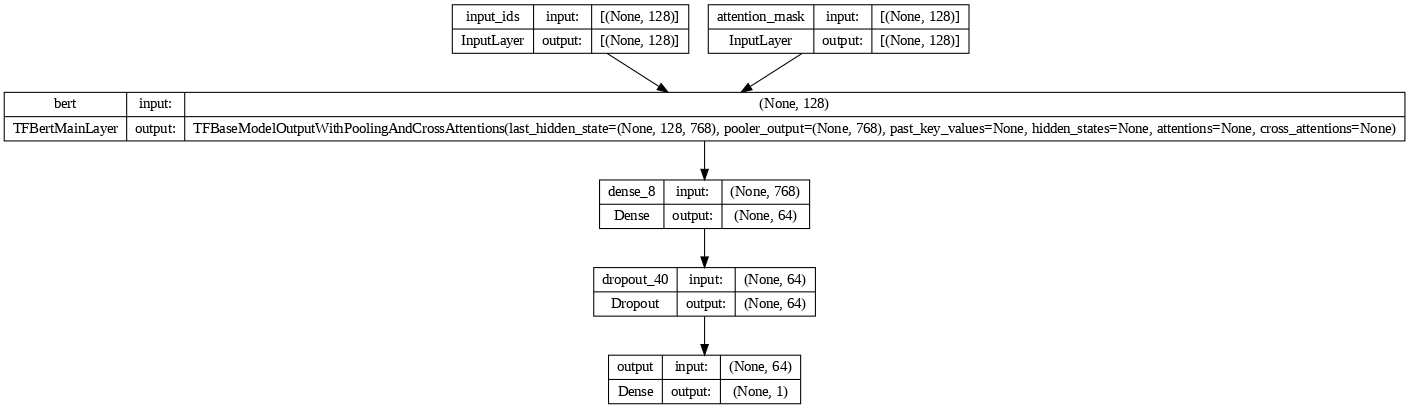

In [38]:
tf.keras.utils.plot_model(model=model, dpi=76, show_shapes=True)

## Task 11: Evaluate the BERT Text Classification Model

In [39]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

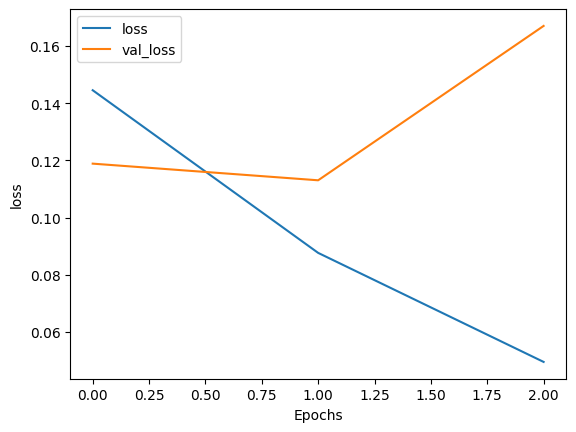

In [41]:
plot_graphs(history, "loss")

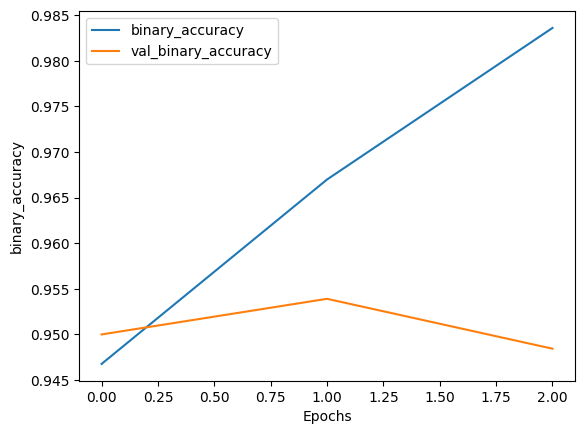

In [43]:
plot_graphs(history, "binary_accuracy")

## Predict Samples

In [67]:
samples = ['What does it mean when a girl and her guy friend is talking about you while you are passing by and she tells him to comment later?',
       'What are the best ways to start a startup?','I am working at WiFi hardware team as a verification engineer at Qualcomm, Chennai and I got an offer from Nvidia, Bangalore in clock IP team. Which one should I need to choose?',
           'Is time travell is possible?','What makes a halogen light more efficient than standard filament bulbs?', 'Why changing the windows computer name needs restart? At what locations does the computer name gets updated after the restart?',
           'Why are vegans always discriminated by non-vegans?','Are there any Quoran here who cracked SSC CGL as SC student?']
test_data = tf.data.Dataset.from_tensor_slices((samples, [0]* len(samples)))
test_data = test_data.map(to_feature_map).batch(16).shuffle(10000).prefetch(3)
preds = model.predict(test_data)
print(["Insincere" if pred[0]>0.5 else "Sincere" for pred in preds])

1/1 [==============================] - 0s 180ms/step
['Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere', 'Insincere', 'Sincere']
